In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
file_path = '/content/ElectionSyntheticVsRealTopics.csv'
data = pd.read_csv(file_path)

real_data = data[data['Synthetic'] == 'Real']
synthetic_data = data[data['Synthetic'] == 'Synthetic']
shared_data = data[data['Synthetic'] == 'Shared']

def preprocess_and_create_word_cloud(data, title):
    text = ' '.join(data.iloc[:, 1])

    vectorizer = CountVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]+\b', lowercase=True)
    counts = vectorizer.fit_transform([text])

    words = vectorizer.get_feature_names_out()

    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(lemmatized_words))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


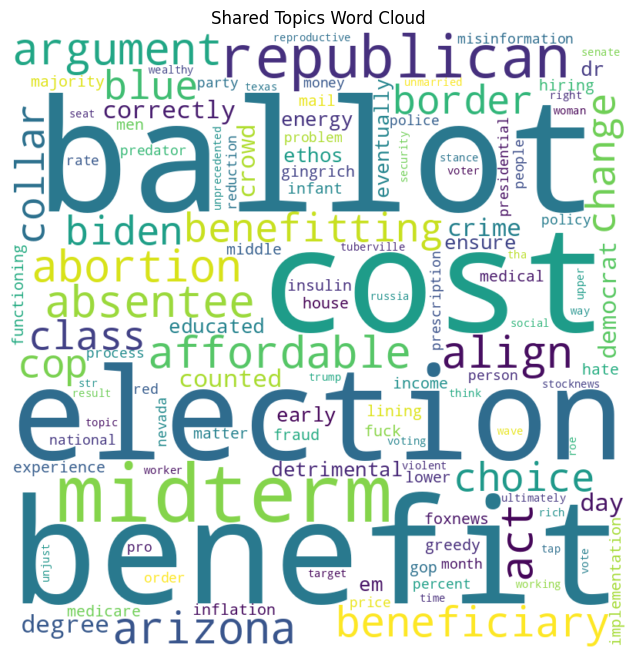

In [ ]:
#preprocess_and_create_word_cloud(real_data, "Unique Real Topics Word Cloud")
#preprocess_and_create_word_cloud(synthetic_data, "Unique Synthetic Topics Word Cloud")
preprocess_and_create_word_cloud(shared_data, "Shared Topics Word Cloud")